In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #Setting the default for plots

In [188]:
train_data = pd.read_csv('train.csv')
for data in train_data:
    print(data)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [129]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
test_data = pd.read_csv('test.csv')

In [131]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
print("Number of rows : ",train_data.shape[0], "and number of columns:", train_data.shape[1])

Number of rows :  891 and number of columns: 12


In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin and embark has few Null values(NaN)

# Exploring Data

In [134]:
#Counting the number of Null values 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Plots

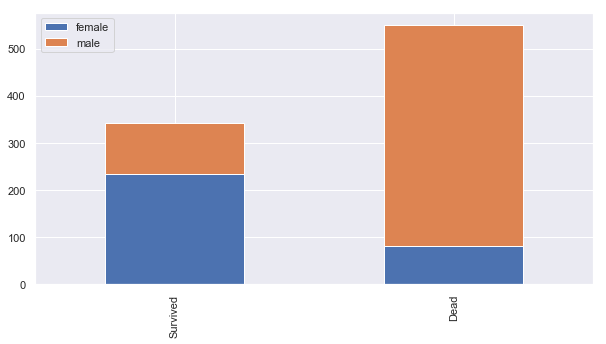

In [136]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    #print(df)
    df.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart('Sex')

Female are more likely to be survived compared to male

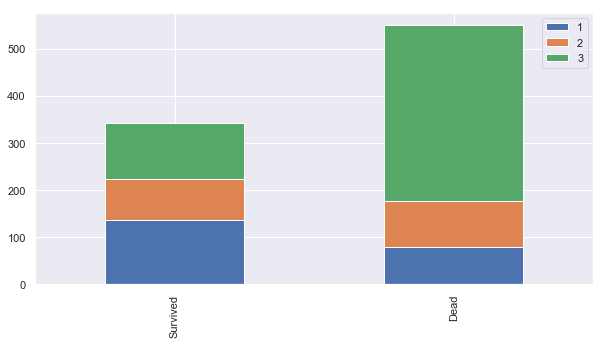

In [137]:
bar_chart('Pclass')

1st class passengers more likely to survive compared to 2nd and 3rd classes

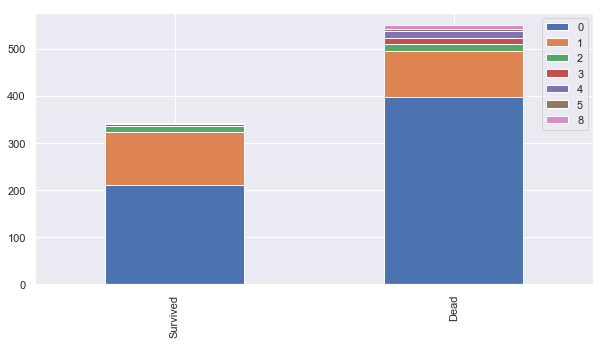

In [138]:
bar_chart('SibSp')

Passengers with more than 3 siblings or spouse are likely to survived

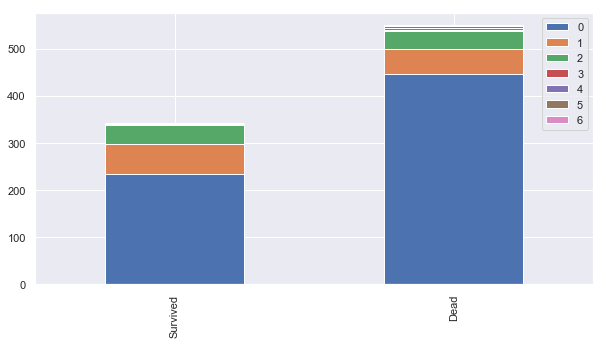

In [139]:
bar_chart('Parch')

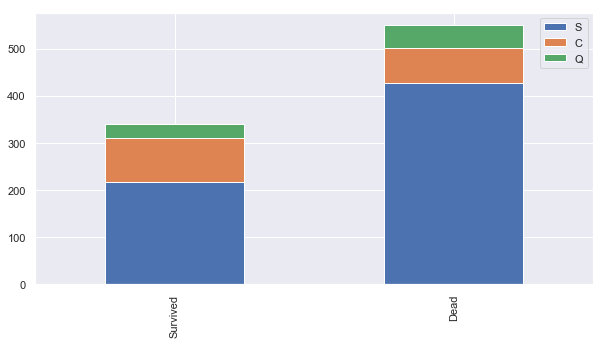

In [140]:
bar_chart('Embarked')

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

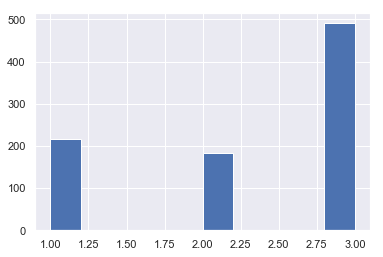

In [141]:
plt.hist(train_data['Pclass'])

# Feature Engineering

In [142]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
train_test = [train_data, test_data] #combining data
print(len(train_test))

for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\. ', expand= False)


2


In [144]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [145]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [190]:
### Mapping the title, encoding 

title_mapping = {"Mr": 0, "Miss": 1, "Mrs":2, 
                "Master":3, "Dr": 3, "Rev":3, "Major": 3, "Col" : 3, "Mlle": 3,
                "Jonkheer":3, "Capt":3, "Don": 3, "Sir":3, "Lady":3, "Countess":3,
                "Ms":3, "Mme":3, "Dona":3}

for dataset in train_test:
#     print(dataset['Title'])
    dataset['Title'] = dataset['Title'].map(title_mapping)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
861   NaN
862   NaN
863   NaN
864   NaN
865   NaN
866   NaN
867   NaN
868   NaN
869   NaN
870   NaN
871   NaN
872   NaN
873   NaN
874   NaN
875   NaN
876   NaN
877   NaN
878   NaN
879   NaN
880   NaN
881   NaN
882   NaN
883   NaN
884   NaN
885   NaN
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Title, Length: 891, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
388   NaN
389   NaN
390   NaN
391   NaN

In [147]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


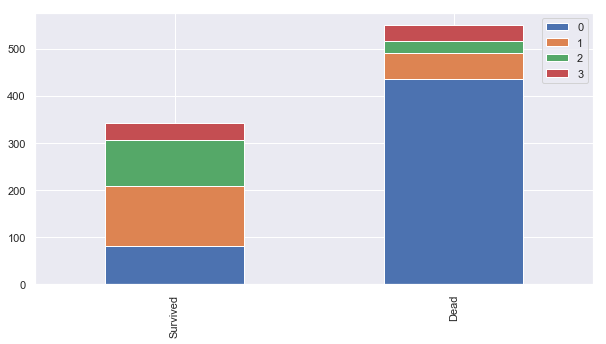

In [148]:
bar_chart('Title') ### Less Mr. survived compared to Miss

In [149]:
# Delete name now as it is not necessary anymore
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace = True)

In [150]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [151]:
### Mapping of sex
sex_mapping = {"male":0, "female":1}
for dataset in train_test:
    print(dataset)
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
5              6         0       3    male   NaN      0      0   
6              7         0       1    male  54.0      0      0   
7              8         0       3    male   2.0      3      1   
8              9         1       3  female  27.0      0      2   
9             10         1       2  female  14.0      1      0   
10            11         1       3  female   4.0      1      1   
11            12         1       1  female  58.0      0      0   
12            13         0       3    male  20.0      0      0   
13            14         0       3    male  39.0      1      5   
14        

# Filling the missing values

In [152]:
### filling the age with median grouped by title (Mr, Mrs, Miss, Others)
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform("median"), inplace=True)
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform("median"), inplace=True)

In [153]:
test_data['Age'].isnull().sum()

0

In [154]:
### Binning to five categories based on age 
# child:0, young:1, adult:2, mid-age:3, senior:4

for dataset in train_test:
    dataset.loc[dataset["Age"] <= 16, 'Age'] = 0,
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26), 'Age'] = 1,
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36), 'Age'] = 2,
    dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <= 62), 'Age'] = 3,
    dataset.loc[dataset["Age"] > 62, 'Age'] = 4

In [155]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


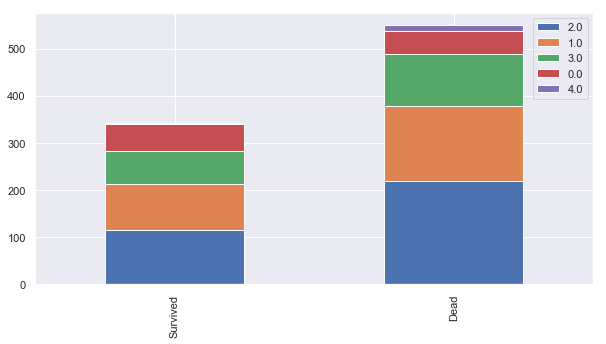

In [156]:
bar_chart('Age')

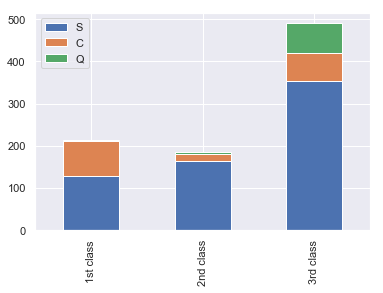

In [157]:
### Filling missing values in Embarked

Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True)

It can be seen that most of embarkation in all 3 classes is from S

In [158]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [159]:
train_data['Embarked'].isnull().sum()

0

In [160]:
### Encoding of Embarked to numeric
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [161]:
### filling missing fare value
test_data['Fare'].fillna(test_data.groupby("Pclass")["Fare"].transform('median'), inplace = True)
train_data['Fare'].fillna(train_data.groupby("Pclass")["Fare"].transform('median'), inplace = True)

In [162]:
### Binning the fare values 
for dataset in train_test:
    dataset.loc[dataset["Fare"] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), 'Fare'] = 2,
    dataset.loc[dataset["Fare"] > 100, 'Fare'] = 3

In [163]:
train_data.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F2                 3
D                  3
F33                3
C22 C26            3
E101               3
C92                2
C93                2
D36                2
D35                2
F G73              2
C78                2
B51 B53 B55        2
D33                2
E24                2
D17                2
D26                2
B57 B59 B63 B66    2
E44                2
E67                2
F4                 2
E121               2
C52                2
B58 B60            2
B22                2
C125               2
B49                2
C83                2
                  ..
C110               1
A19                1
C32                1
B86                1
C91                1
C90                1
B102               1
B4                 1
E31                1
B41                1
D48                1
B3                 1
E38                1
D47                1
E12                1
C45                1
D45          

In [164]:
### Mapping cabin

for dataset in train_test:
    dataset["Cabin"] = dataset["Cabin"].str[:1]
cabin_mapping = {'A':0,'B':0.4,'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T':2.8}
for dataset in train_test:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)
    

In [165]:
# Fill missing cabin value with median for each class
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

# Making a new column with family size

In [166]:
for dataset in train_test:
    dataset['FamilySize'] = dataset["SibSp"] + dataset["Parch"] + 1

In [167]:
family_mapping = {1:0, 2: 0.4, 3:0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [168]:
### Dropping SibSP, Parch and Ticket columns
features_drop = ["Ticket", "SibSp", "Parch"]
train_data = train_data.drop(features_drop, axis = 1)
test_data = test_data.drop(features_drop, axis = 1)
train_data = train_data.drop(['PassengerId'], axis = 1)

In [169]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


# Feature Learning

# Modelling

In [170]:
# importing classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Cross Validation(K-fold)

In [171]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [172]:
train = train_data.drop('Survived', axis = 1)
target = train_data['Survived']

train.shape, target.shape

((891, 8), (891,))

In [173]:
### KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs = 1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [174]:
### KNN score 
round(np.mean(score)*100, 2)

82.6

In [175]:
### Decision tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.86516854 0.75280899
 0.84269663 0.82022472 0.74157303 0.78651685]


In [176]:
round(np.mean(score)*100, 2)

79.46

In [177]:
### Random Forest 
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train, target, cv=k_fold, n_jobs = 1, scoring = 'accuracy')
print(score)

[0.8        0.79775281 0.80898876 0.7752809  0.85393258 0.79775281
 0.83146067 0.80898876 0.75280899 0.83146067]


In [178]:
round(score.mean()*100, 2)

80.58

In [179]:
### Naive Bayes
cls = GaussianNB()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
print(score)

[0.81111111 0.80898876 0.80898876 0.82022472 0.86516854 0.7752809
 0.84269663 0.79775281 0.76404494 0.79775281]


In [180]:
score.mean()*100

80.92009987515605

In [181]:
###SVM
clf = SVC()
score = cross_val_score(clf, train, target, cv = k_fold, n_jobs =1, scoring = 'accuracy')
print(score)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [182]:
round(score.mean()*100, 2)

83.5

# SVM has highest accuracy, hence SVM is used

In [183]:
clf = SVC()
clf.fit(train, target)

test = test_data.drop("PassengerId", axis = 1).copy()
prediction = clf.predict(test)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [184]:
submission = pd.DataFrame({
    "PassengerId" : test_data["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index = False)

In [185]:
sub = pd.read_csv('submission.csv')

In [186]:
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
